In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

# 設定基礎路徑
base_dir = "H:/lung_cancer_dataset/Lung Cancer Dataset 2"

# 檢查數據集結構
for folder in ['Lung Cancer', 'Normal']:
    folder_path = os.path.join(base_dir, folder)
    if os.path.exists(folder_path):
        files = os.listdir(folder_path)
        print(f"{folder}: {len(files)} images")
        # 打印前幾個文件名作為示例
        print(f"Sample files: {files[:3]}\n")
    else:
        print(f"{folder} folder not found!")


Lung Cancer: 238 images
Sample files: ['Cancerous1.jpg', 'Cancerous10.jpg', 'Cancerous100.jpg']

Normal: 126 images
Sample files: ['Non-Cancerous1.jpg', 'Non-Cancerous10.jpg', 'Non-Cancerous100.jpg']



In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 設定圖片參數
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# 定義數據增強和預處理
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 像素值歸一化
    validation_split=0.2,  # 20% 數據用於驗證
    rotation_range=20,  # 隨機旋轉
    width_shift_range=0.2,  # 水平平移
    height_shift_range=0.2,  # 垂直平移
    horizontal_flip=True,  # 水平翻轉
    fill_mode='nearest'
)

# 創建訓練集和驗證集的數據生成器
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# 顯示類別信息
print("類別標籤映射:", train_generator.class_indices)

Found 292 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
類別標籤映射: {'Lung Cancer': 0, 'Normal': 1}


In [4]:
# 建立第一個 CNN 模型
def create_model():
    model = models.Sequential([
        # 第一個卷積塊
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # 第二個卷積塊
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # 第三個卷積塊
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # 全連接層
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # 編譯模型
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 創建模型
model = create_model()

# 顯示模型結構
model.summary()

H:\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

H:\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 872ms/step - accuracy: 0.6801 - loss: 3.2430 - val_accuracy: 0.6528 - val_loss: 2.5317 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 489ms/step - accuracy: 0.9153 - loss: 1.7539 - val_accuracy: 0.6528 - val_loss: 6.9280 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.9493 - loss: 0.4526 - val_accuracy: 0.6528 - val_loss: 8.6275 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - accuracy: 0.9633 - loss: 0.6348 - val_accuracy: 0.6528 - val_loss: 12.8282 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.9798 - loss: 0.3185 - val_accuracy: 0.6528 - val_loss: 19.3048 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 506ms/step - accuracy: 0.9899 - loss: 0.1419 - val_accuracy: 0.6528 - val_loss: 22.7404 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 466ms/step - accuracy: 0.9785 - loss: 0.320

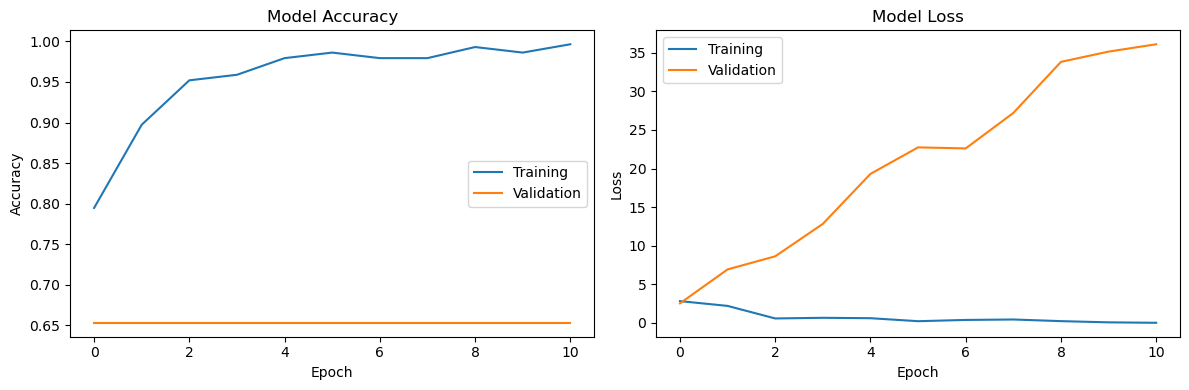

In [5]:
# 設置回調函數
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

# 訓練模型
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 繪製訓練過程
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 繪製準確率
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # 繪製損失
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# 顯示訓練結果
plot_training_history(history)

In [6]:
def create_model_v1_improved():
    model = models.Sequential([
        # 第一個卷積塊 - 減少初始特徵數
        layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # 第二個卷積塊
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # 第三個卷積塊
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        # 降維
        layers.Flatten(),
        
        # 加強正則化的全連接層
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # 輸出層
        layers.Dense(1, activation='sigmoid')
    ])
    
    # 使用較小的學習率
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# 創建改進的模型
model = create_model_v1_improved()
model.summary()

# 增強數據增強
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 修改訓練參數
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.000001
    )
]

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,237,857 (12.35 MB)

 Trainable params: 3,237,441 (12.35 MB)

 Non-trainable params: 416 (1.62 KB)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.6146 - loss: 0.7248 - val_accuracy: 0.7361 - val_loss: 0.6320 - learning_rate: 1.0000e-04
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.8425 - loss: 0.3879 - val_accuracy: 0.6528 - val_loss: 0.5970 - learning_rate: 1.0000e-04
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.8844 - loss: 0.2921 - val_accuracy: 0.6528 - val_loss: 0.6142 - learning_rate: 1.0000e-04
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step - accuracy: 0.8491 - loss: 0.3301 - val_accuracy: 0.6528 - val_loss: 0.6252 - learning_rate: 1.0000e-04
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.9358 - loss: 0.2203 - val_accuracy: 0.6528 - val_loss: 0.6337 - learning_rate: 1.0000e-04
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.8779 - loss: 0.2884 - val_accuracy: 0.6528 - val_loss: 0.6343 - learning_rate: 2.0000e-05
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 

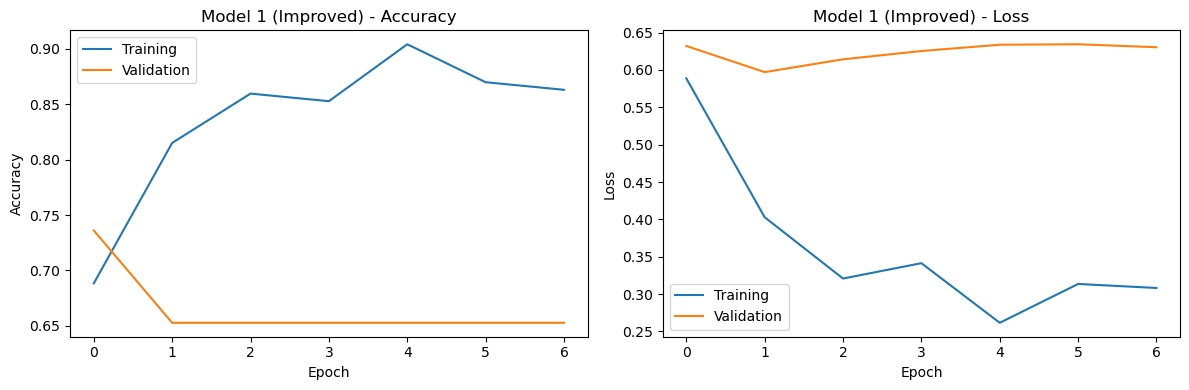

In [7]:
# 訓練改進後的第一個模型
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.000001
    )
]

epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 繪製訓練過程
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 繪製準確率
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Model 1 (Improved) - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # 繪製損失
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Model 1 (Improved) - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# 顯示訓練結果
plot_training_history(history)

Found 292 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Model Structure:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 112, 112,  │      9,472 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 56, 56,    │     36,928 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 56, 56,    │     36,928 │ re_lu_3[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_10[0][0] 

 Total params: 2,856,577 (10.90 MB)

 Trainable params: 2,851,585 (10.88 MB)

 Non-trainable params: 4,992 (19.50 KB)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.5655 - auc: 0.6820 - loss: 0.7784

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 836ms/step - accuracy: 0.5758 - auc: 0.6923 - loss: 0.7668 - val_accuracy: 0.6528 - val_auc: 0.6566 - val_loss: 0.6792 - learning_rate: 1.0000e-04
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 637ms/step - accuracy: 0.7408 - auc: 0.9161 - loss: 0.4945 - val_accuracy: 0.6528 - val_auc: 0.6528 - val_loss: 0.6570 - learning_rate: 1.0000e-04
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 663ms/step - accuracy: 0.8398 - auc: 0.9443 - loss: 0.3694 - val_accuracy: 0.6528 - val_auc: 0.7021 - val_loss: 0.6435 - learning_rate: 1.0000e-04
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 626ms/step - accuracy: 0.8449 - auc: 0.9456 - loss: 0.3545 - val_accuracy: 0.6528 - val_auc: 0.6085 - val_loss: 0.6486 - learning_rate: 1.0000e-04
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 697ms/step - accuracy: 0.8312 - auc: 0.8437 - loss: 0.4369 - val_accuracy: 0.6528 - val_auc: 0.5460 - val_loss: 0.6724 - learning_rate: 1.0000e-04
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 639ms/step - accuracy: 0.9337

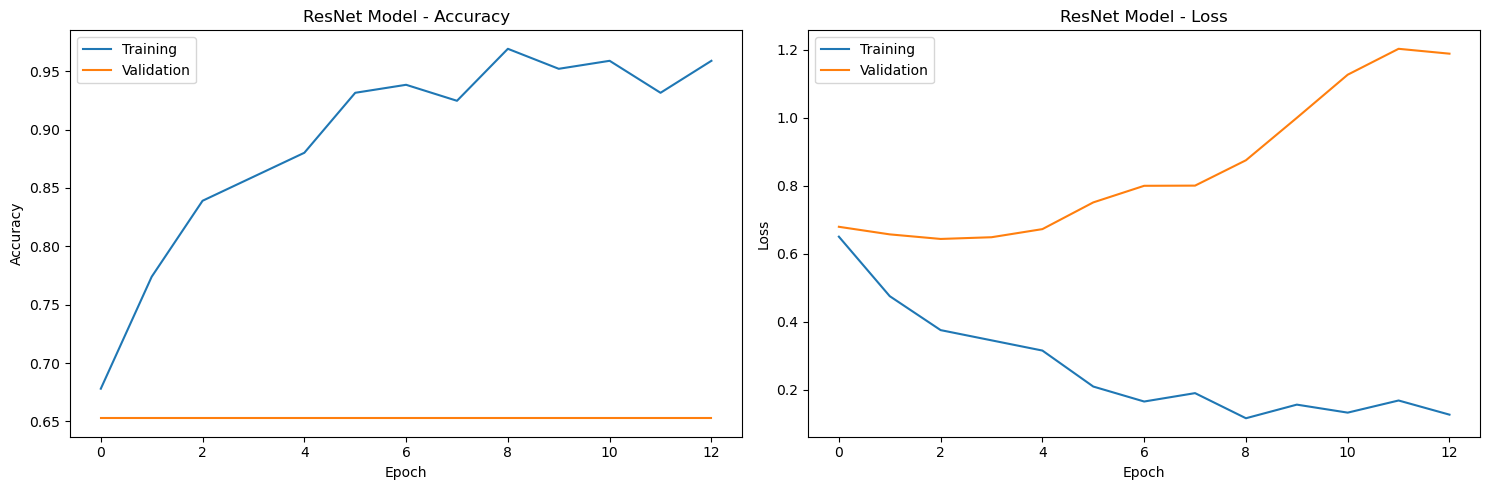

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 設定圖片參數
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
base_dir = "H:/lung_cancer_dataset/Lung Cancer Dataset 2"

# 數據增強
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 創建數據生成器
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# 定義殘差塊
def residual_block(x, filters, kernel_size=3, stride=1):
    # 殘差路徑
    residual = x

    # 主路徑
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # 如果維度不匹配，調整殘差路徑
    if stride != 1 or residual.shape[-1] != filters:
        residual = layers.Conv2D(filters, 1, strides=stride, padding='same')(residual)
        residual = layers.BatchNormalization()(residual)

    # 添加殘差連接
    x = layers.Add()([x, residual])
    x = layers.ReLU()(x)
    
    return x

# 創建 ResNet 風格的模型
def create_resnet_model():
    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    
    # 初始卷積層
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # 第一組殘差塊
    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = layers.Dropout(0.2)(x)
    
    # 第二組殘差塊
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = layers.Dropout(0.3)(x)
    
    # 第三組殘差塊
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = layers.Dropout(0.4)(x)
    
    # 全局平均池化
    x = layers.GlobalAveragePooling2D()(x)
    
    # 全連接層
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs, outputs)
    
    # 編譯模型
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    
    return model

# 創建模型
model = create_resnet_model()
print("Model Structure:")
model.summary()

# 設置回調函數
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_resnet_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    )
]

# 訓練模型
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

# 繪製訓練結果
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 繪製準確率
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('ResNet Model - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # 繪製損失
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('ResNet Model - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# 顯示訓練結果
plot_training_history(history)

Found 292 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Model Structure:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,112,001 (57.65 MB)

 Trainable params: 395,777 (1.51 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

Phase 1: Training only top layers
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6051 - auc_3: 0.6676 - loss: 0.7727

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6068 - auc_3: 0.6712 - loss: 0.7687 - val_accuracy: 0.3750 - val_auc_3: 0.9438 - val_loss: 1.4590 - learning_rate: 1.0000e-04
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7073 - auc_3: 0.8062 - loss: 0.6073

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7099 - auc_3: 0.8116 - loss: 0.6009 - val_accuracy: 0.3889 - val_auc_3: 0.9638 - val_loss: 1.6056 - learning_rate: 1.0000e-04
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7989 - auc_3: 0.9333 - loss: 0.4465

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8010 - auc_3: 0.9334 - loss: 0.4419 - val_accuracy: 0.4444 - val_auc_3: 0.9574 - val_loss: 1.4965 - learning_rate: 1.0000e-04
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8441 - auc_3: 0.9508 - loss: 0.3430

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8452 - auc_3: 0.9516 - loss: 0.3411 - val_accuracy: 0.5417 - val_auc_3: 0.9574 - val_loss: 1.1911 - learning_rate: 1.0000e-04
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8858 - auc_3: 0.9860 - loss: 0.2689

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8872 - auc_3: 0.9854 - loss: 0.2680 - val_accuracy: 0.5694 - val_auc_3: 0.9779 - val_loss: 0.9964 - learning_rate: 1.0000e-04
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8856 - auc_3: 0.9855 - loss: 0.2723

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8863 - auc_3: 0.9851 - loss: 0.2704 - val_accuracy: 0.6250 - val_auc_3: 0.9894 - val_loss: 0.7464 - learning_rate: 1.0000e-04
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9128 - auc_3: 0.9850 - loss: 0.1980

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9139 - auc_3: 0.9854 - loss: 0.1968 - val_accuracy: 0.7639 - val_auc_3: 1.0000 - val_loss: 0.5788 - learning_rate: 1.0000e-04
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9272 - auc_3: 0.9926 - loss: 0.1764

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9279 - auc_3: 0.9926 - loss: 0.1754 - val_accuracy: 0.7778 - val_auc_3: 1.0000 - val_loss: 0.5924 - learning_rate: 1.0000e-04
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9711 - auc_3: 0.9995 - loss: 0.1291

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9713 - auc_3: 0.9995 - loss: 0.1282 - val_accuracy: 0.8333 - val_auc_3: 1.0000 - val_loss: 0.4462 - learning_rate: 1.0000e-04
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9768 - auc_3: 0.9996 - loss: 0.0990 - val_accuracy: 0.8194 - val_auc_3: 1.0000 - val_loss: 0.3757 - learning_rate: 1.0000e-04
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9604 - auc_3: 0.9979 - loss: 0.1315

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9609 - auc_3: 0.9978 - loss: 0.1292 - val_accuracy: 0.8611 - val_auc_3: 0.9991 - val_loss: 0.3378 - learning_rate: 1.0000e-04
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9711 - auc_3: 0.9985 - loss: 0.1169

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9715 - auc_3: 0.9985 - loss: 0.1148 - val_accuracy: 0.8889 - val_auc_3: 1.0000 - val_loss: 0.3047 - learning_rate: 1.0000e-04
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9710 - auc_3: 0.9986 - loss: 0.0819

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9708 - auc_3: 0.9986 - loss: 0.0829 - val_accuracy: 0.9444 - val_auc_3: 1.0000 - val_loss: 0.2285 - learning_rate: 1.0000e-04
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9527 - auc_3: 0.9890 - loss: 0.1526 - val_accuracy: 0.9028 - val_auc_3: 0.9974 - val_loss: 0.2543 - learning_rate: 1.0000e-04
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9784 - auc_3: 0.9993 - loss: 0.0849 - val_accuracy: 0.9028 - val_auc_3: 0.9991 - val_loss: 0.2674 - learning_rate: 1.0000e-04
Epoch 16/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9692 - auc_3: 0.9989 - loss: 0.0842 - val_accuracy: 0.9444 - val_auc_3: 1.0000 - val_loss: 0.1677 - learning_rate: 1.0000e-04
Epoch 17/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9836 - auc_3: 0.9990 - loss: 0.0641 - val_accuracy: 0.9167 - val_auc_3: 0.9991 - val_loss: 0.2071 - learning_rate: 1.0000e-04
Epoch 18/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accu

10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9771 - auc_3: 0.9986 - loss: 0.0611 - val_accuracy: 0.9722 - val_auc_3: 1.0000 - val_loss: 0.1034 - learning_rate: 1.0000e-04
Phase 2: Fine-tuning last few layers
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9906 - auc_4: 0.9998 - loss: 0.0590 - val_accuracy: 0.9028 - val_auc_4: 1.0000 - val_loss: 0.2205 - learning_rate: 1.0000e-05
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9811 - auc_4: 0.9991 - loss: 0.0552 - val_accuracy: 0.8889 - val_auc_4: 1.0000 - val_loss: 0.2748 - learning_rate: 1.0000e-05
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9857 - auc_4: 0.9983 - loss: 0.0478 - val_accuracy: 0.8889 - val_auc_4: 0.9894 - val_loss: 0.2881 - learning_rate: 1.0000e-05
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9952 - auc_4: 0.9995 - loss: 0.0390 - val_accuracy: 0.9444 - val_auc_4: 1.0000 - val_loss: 0.2037 - learning_rate: 1.0000e-05
Epoch 5/20
10/10 ━━━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9947 - auc_4: 0.9998 - loss: 0.0317 - val_accuracy: 0.9861 - val_auc_4: 1.0000 - val_loss: 0.0593 - learning_rate: 1.0000e-05
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9966 - auc_4: 0.9994 - loss: 0.0412 - val_accuracy: 0.9861 - val_auc_4: 0.9991 - val_loss: 0.0778 - learning_rate: 1.0000e-05
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9848 - auc_4: 0.9982 - loss: 0.0573 - val_accuracy: 0.9861 - val_auc_4: 1.0000 - val_loss: 0.0483 - learning_rate: 1.0000e-05
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9759 - auc_4: 0.9995 - loss: 0.0741 - val_accuracy: 0.9722 - val_auc_4: 1.0000 - val_loss: 0.0680 - learning_rate: 1.0000e-05
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9838 - auc_4: 0.9975 - loss: 0.0747 - val_accuracy: 0.9861 - val_auc_4: 1.0000 - val_loss: 0.0751 - learning_rate: 1.0000e-05
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accu

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9631 - auc_4: 0.9984 - loss: 0.0845 - val_accuracy: 1.0000 - val_auc_4: 1.0000 - val_loss: 0.0667 - learning_rate: 1.0000e-05
Epoch 18/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9940 - auc_4: 0.9996 - loss: 0.0438 - val_accuracy: 0.9861 - val_auc_4: 0.9974 - val_loss: 0.1115 - learning_rate: 1.0000e-05
Epoch 19/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9492 - auc_4: 0.9949 - loss: 0.1319 - val_accuracy: 0.9583 - val_auc_4: 1.0000 - val_loss: 0.1077 - learning_rate: 1.0000e-05
Epoch 20/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9787 - auc_4: 0.9990 - loss: 0.0570 - val_accuracy: 0.9861 - val_auc_4: 1.0000 - val_loss: 0.0651 - learning_rate: 1.0000e-05


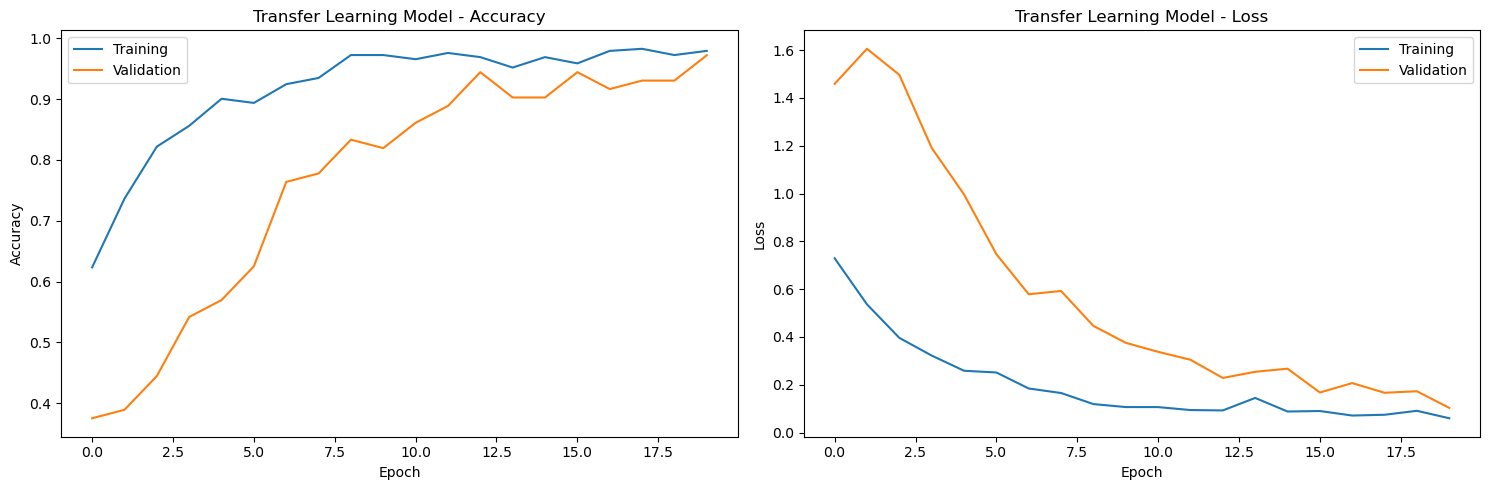

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 設定參數
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
base_dir = "H:/lung_cancer_dataset/Lung Cancer Dataset 2"

# 數據增強
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,  # VGG16 預處理
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 創建數據生成器
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

def create_transfer_model():
    # 加載預訓練的 VGG16 模型
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
    )
    
    # 凍結基礎模型的層
    base_model.trainable = False
    
    # 創建新的模型
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    
    # 編譯模型
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    
    return model

# 創建模型
model = create_transfer_model()
print("Model Structure:")
model.summary()

# 設置回調函數
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_transfer_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    )
]

# 第一階段訓練 - 只訓練頂層
print("Phase 1: Training only top layers")
history_1 = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 解凍部分 VGG16 層進行微調
print("Phase 2: Fine-tuning last few layers")
base_model = model.layers[0]
base_model.trainable = True

# 只解凍最後幾層
for layer in base_model.layers[:-4]:
    layer.trainable = False

# 重新編譯模型（使用更小的學習率）
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# 第二階段訓練 - 微調
history_2 = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 繪製訓練結果
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 繪製準確率
    ax1.plot(history.history['accuracy'], label='Training')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Transfer Learning Model - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # 繪製損失
    ax2.plot(history.history['loss'], label='Training')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Transfer Learning Model - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# 顯示訓練結果
plot_training_history(history_1)

Starting fine-tuning phase...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9923 - auc_5: 0.9986 - loss: 0.0368 - val_accuracy: 0.9861 - val_auc_5: 1.0000 - val_loss: 0.0279 - learning_rate: 1.0000e-05
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9871 - auc_5: 0.9990 - loss: 0.0427 - val_accuracy: 1.0000 - val_auc_5: 1.0000 - val_loss: 0.0161 - learning_rate: 1.0000e-05
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9388 - auc_5: 0.9090 - loss: 0.1245 - val_accuracy: 0.9861 - val_auc_5: 1.0000 - val_loss: 0.0347 - learning_rate: 1.0000e-05
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9959 - auc_5: 0.9998 - loss: 0.0416 - val_accuracy: 0.9861 - val_auc_5: 1.0000 - val_loss: 0.0396 - learning_rate: 1.0000e-05
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9825 - auc_5: 0.9995 - loss: 0.0358 - val_accuracy: 0.9861 - val_auc_5: 0.9979 - val_loss: 0.0943 - learning_rate: 1.0000e-05
Epoch 6/20
10/10 ━━━

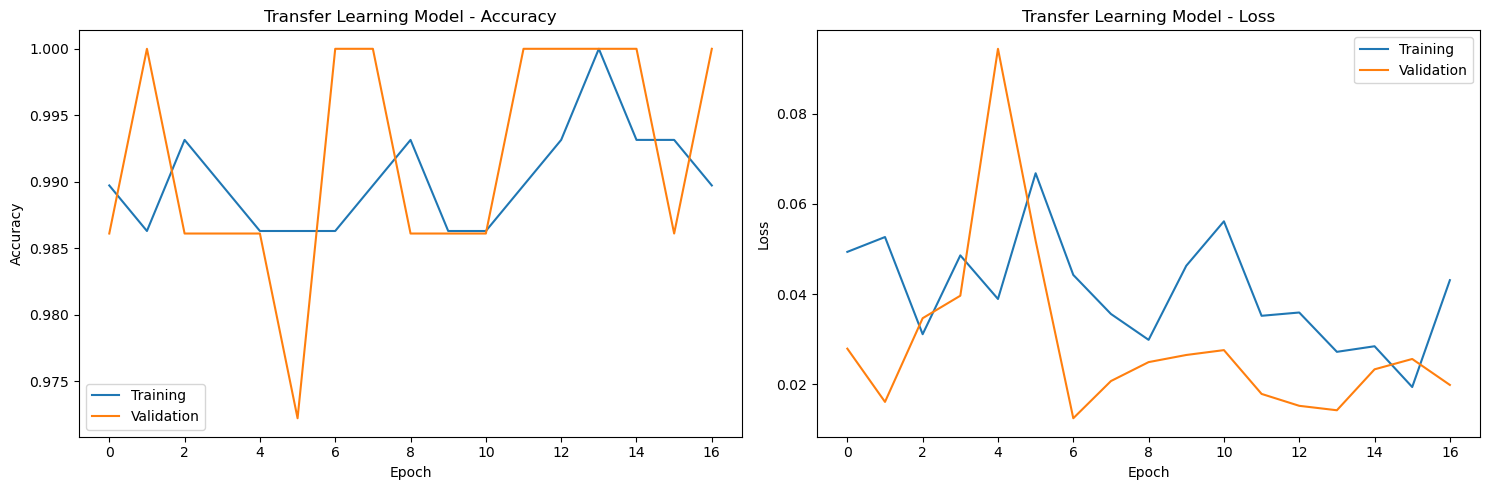

In [11]:
# 第二階段：微調訓練
print("Starting fine-tuning phase...")

# 解凍部分 VGG16 層
base_model = model.layers[0]
base_model.trainable = True

# 只解凍最後 4 個卷積層
for layer in base_model.layers[:-4]:
    layer.trainable = False

# 使用更小的學習率重新編譯模型
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# 第二階段訓練
history_2 = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

# 繪製第二階段結果
plot_training_history(history_2)